In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#Nao tem como commitar os datasets, sao mt grandes

try:
    data = pd.read_csv("extrato_bancario_partido_2022/extrato_bancario_partido_2022.csv", delimiter=';', encoding='latin1')
except UnicodeDecodeError:
    try:
        data = pd.read_csv("extrato_bancario_partido_2022/extrato_bancario_partido_2022.csv", delimiter=';', encoding='iso-8859-1')
    except UnicodeDecodeError:
        data = pd.read_csv("extrato_bancario_partido_2022/extrato_bancario_partido_2022.csv", delimiter=';', encoding='cp1252')

print(data.head())

print(data.info())

print(data.isnull().sum())

for column in data.columns:
    print(data.columns)



/tmp/ipykernel_139804/3801253265.py:2: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("extrato_bancario_partido_2022/extrato_bancario_partido_2022.csv", delimiter=';', encoding='latin1')


   DT_GERACAO HH_GERACAO  AA_REFERENCIA  NR_CNPJ_PRESTADOR_CONTA SG_PARTIDO  \
0  05/09/2024   00:05:07           2022           15692326000102     AVANTE   
1  05/09/2024   00:05:07           2022           15692326000102     AVANTE   
2  05/09/2024   00:05:07           2022           15692326000102     AVANTE   
3  05/09/2024   00:05:07           2022           15692326000102     AVANTE   
4  05/09/2024   00:05:07           2022           15692326000102     AVANTE   

   NM_ESFERA  TP_PESSOA DS_LANCAMENTO DT_LANCAMENTO NR_DOCUMENTO  ...  \
0  Municipal         -1    PAG BOLETO    03/08/2022       425490  ...   
1  Municipal         -1      PAG AGUA    09/12/2022       460736  ...   
2  Municipal         -1    DB CEST PJ    13/12/2022       112022  ...   
3  Municipal          1      CRED TED    13/05/2022           33  ...   
4  Municipal         -1     SALDO DIA    12/04/2022            0  ...   

  VR_LANCAMENTO  CD_BANCO_CONTRAPARTE NM_BANCO_CONTRAPARTE  \
0        135,77         

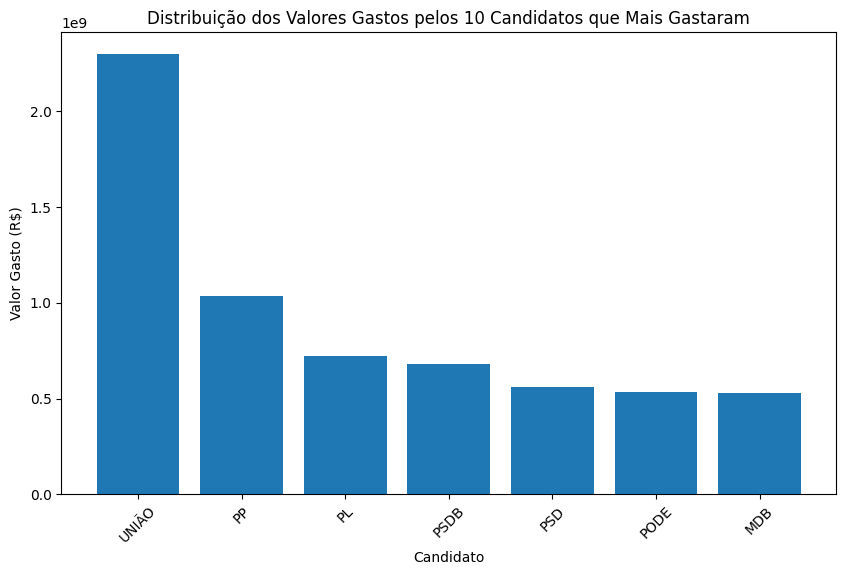

In [8]:
data['VR_LANCAMENTO'] = data['VR_LANCAMENTO'].astype(str).str.replace(',', '.').astype(float)

# Agrupando os gastos por candidato
gastos_por_candidato = data.groupby(['NR_CPF_CNPJ_CONTRAPARTE', 'SG_PARTIDO'])['VR_LANCAMENTO'].sum()

# Selecionando os 10 candidatos que mais gastaram
top_10_gastadores = gastos_por_candidato.nlargest(10).reset_index()

# Plotando o gráfico
plt.figure(figsize=(10, 6))
plt.bar(top_10_gastadores['SG_PARTIDO'], top_10_gastadores['VR_LANCAMENTO'])
plt.title('Distribuição dos Valores Gastos pelos 10 Partidos que Mais Gastaram')
plt.xlabel('Candidato')
plt.ylabel('Valor Gasto (R$)')

plt.xticks(rotation=45)
plt.show()